In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import os
import re

## Test Strapint from a single url

In [1]:


# Function to scrape website content
def scrape_website(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Failed to fetch the URL: {url}")
    
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extracting all text content from the page
    text_content = soup.get_text(separator=' ', strip=True)
    
    return text_content

# Function to analyze and summarize text
def analyze_text(text):
    # Tokenize the text into sentences and words
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    
    # Convert words to lowercase and filter out stop words and punctuation
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    
    # Count word frequencies
    word_freq = Counter(words)
    
    # Get the most common words
    most_common_words = word_freq.most_common(10)
    
    # Create a summary (simple approach: first 5 sentences)
    summary = ' '.join(sentences[:5])
    
    return {
        'total_sentences': len(sentences),
        'total_words': len(words),
        'most_common_words': most_common_words,
        'summary': summary
    }


# Main function
def main():
    url = input("Enter the URL of the website to scrape: ")
    try:
        text_content = scrape_website(url)
        analysis_result = analyze_text(text_content)
        
        print("Text Analysis Summary:")
        print(f"Total Sentences: {analysis_result['total_sentences']}")
        print(f"Total Words: {analysis_result['total_words']}")
        print("Most Common Words:")
        for word, freq in analysis_result['most_common_words']:
            print(f"  {word}: {freq}")
 
        
    except Exception as e:
        print(e)

if __name__ == "__main__":
    main()



Enter the URL of the website to scrape:  https://digitalmarketinginstitute.com/blog/ai-in-digital-marketing-the-ultimate-guide


Text Analysis Summary:
Total Sentences: 1
Total Words: 107
Most Common Words:
  digital: 9
  marketing: 9
  courses: 6
  articles: 5
  ai: 4
  budget: 4
  resources: 3
  view: 3
  lessons: 3
  podcasts: 3


## Read a list of url, text mining from each url and Save the result to a .csv file

In [17]:

# Function to scrape website content
def scrape_website(url):
    try:
        response = requests.get(url, timeout=10)  # Timeout set to avoid long wait times
        response.raise_for_status()  # Raise an exception for bad HTTP responses
    except requests.exceptions.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return None

    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extracting all text content from the page
    text_content = soup.get_text(separator=' ', strip=True)
    
    return text_content

# Function to analyze and summarize text
def analyze_text(text):
    # Tokenize the text into sentences and words
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    
    # Convert words to lowercase and filter out stop words and punctuation
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    
    # Count word frequencies
    word_freq = Counter(words)
    
    # Get the most common words
    most_common_words = word_freq.most_common(10)
    
    return {
        'total_sentences': len(sentences),
        'total_words': len(words),
        'most_common_words': most_common_words#,
#         'summary': summary
    }

# Function to read URLs from CSV file
def read_urls_from_csv(csv_file_path):
    urls = []
    with open(csv_file_path, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            if row:  # Ensure the row is not empty
                urls.append(row[0])  # Assuming URLs are in the first column
    return urls

# Function to save analysis results to a CSV file
def save_analysis_to_csv(output_file, results):
    # Check if file exists to write headers once
    file_exists = os.path.isfile(output_file)
    
    with open(output_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        
        # Write the header only if the file doesn't exist
        if not file_exists:
            writer.writerow(['Text Analysis Summary'])  # General header for the file

        # Write each result to the file in the desired format
        for result in results:
            writer.writerow([f"URL: {result['url']}"])
            writer.writerow([f"Total Sentences: {result['total_sentences']}"])
            writer.writerow([f"Total Words: {result['total_words']}"])
            writer.writerow(["Most Common Words:"])
            for word, freq in result['most_common_words']:
                writer.writerow([f"  {word}: {freq}"])
            writer.writerow([])  # Blank row for spacing between records


# Main function to process URLs from a CSV and save results
def main():
    input_csv = "Articles.csv" #input("Enter the input CSV file path (with URLs): ")
    output_csv = "Output.csv" #input("Enter the output CSV file path: ")
    
    urls = read_urls_from_csv(input_csv)
    results = []
    for url in urls:
        text_content = scrape_website(url)
        
        if text_content:  # Only analyze if the content was successfully fetched
            analysis_result = analyze_text(text_content)
            analysis_result['url'] = url  # Include the URL in the result for reference
            results.append(analysis_result)

    save_analysis_to_csv(output_csv, results)
    print(f"Analysis completed. Results saved to {output_csv}")


if __name__ == "__main__":
    nltk.download('punkt')
    nltk.download('stopwords')
    main()


[nltk_data] Downloading package punkt to /Users/sbmsoikot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sbmsoikot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Error fetching https://www.kdnuggets.com/the-role-of-ai-in-digital-marketing: 403 Client Error: Forbidden for url: https://www.kdnuggets.com/the-role-of-ai-in-digital-marketing
Error fetching https://digitaltrek.ca/ai-in-digital-marketing-a-comprehensive-overview/: 403 Client Error: Forbidden for url: https://digitaltrek.ca/ai-in-digital-marketing-a-comprehensive-overview/
Error fetching https://www.artificialintelligence-news.com/news/how-ai-is-transforming-digital-marketing-2024-trends-and-insights/: 403 Client Error: Forbidden for url: https://www.artificialintelligence-news.com/news/how-ai-is-transforming-digital-marketing-2024-trends-and-insights/
Analysis completed. Results saved to Output.csv


In [18]:
# Load the CSV file to inspect its contents
file_path = 'Output.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head(14)


,Text Analysis Summary
0,URL: https://digitalmarketinginstitute.com/blo...
1,Total Sentences: 1
2,Total Words: 107
3,Most Common Words:
4,digital: 9
5,marketing: 9
6,courses: 6
7,articles: 5
8,ai: 4
9,budget: 4


In [19]:
# Extracting all rows to inspect the content
df_content = df['Text Analysis Summary'].tolist()
df_content


['URL: https://digitalmarketinginstitute.com/blog/ai-in-digital-marketing-the-ultimate-guide',
 'Total Sentences: 1',
 'Total Words: 107',
 'Most Common Words:',
 '  digital: 9',
 '  marketing: 9',
 '  courses: 6',
 '  articles: 5',
 '  ai: 4',
 '  budget: 4',
 '  resources: 3',
 '  view: 3',
 '  lessons: 3',
 '  podcasts: 3',
 'URL: https://www.forbes.com/councils/forbesbusinesscouncil/2024/06/28/the-role-of-ai-in-digital-marketing-what-you-need-to-know/',
 'Total Sentences: 61',
 'Total Words: 789',
 'Most Common Words:',
 '  ai: 32',
 '  data: 16',
 '  marketing: 12',
 '  digital: 10',
 '  business: 10',
 '  forbes: 9',
 '  nov: 9',
 '  est: 9',
 '  customer: 9',
 '  businesses: 8',
 'URL: https://blog.hubspot.com/marketing/ai-marketing',
 'Total Sentences: 292',
 'Total Words: 3044',
 'Most Common Words:',
 '  ai: 139',
 '  marketing: 104',
 '  free: 51',
 '  content: 39',
 '  hubspot: 32',
 '  use: 31',
 '  digital: 30',
 '  marketers: 30',
 '  customer: 30',
 '  email: 29',
 'URL

In [20]:
# Extracting summary information for each URL

data = []
current_url = None
sentence_count = None
word_count = None

for line in df_content:
    if line.startswith('URL:'):
        if current_url is not None:
            # Save the previous URL data
            data.append({'URL': current_url, 'Total Sentences': sentence_count, 'Total Words': word_count})

        # Start new URL section
        current_url = line.split('URL: ')[1]
        sentence_count = None
        word_count = None

    elif line.startswith('Total Sentences:'):
        sentence_count = int(re.search(r'\d+', line).group())

    elif line.startswith('Total Words:'):
        word_count = int(re.search(r'\d+', line).group())

# Append the last URL data
if current_url is not None:
    data.append({'URL': current_url, 'Total Sentences': sentence_count, 'Total Words': word_count})

# Creating a dataframe from the extracted data
summary_df = pd.DataFrame(data)

display(summary_df)


,URL,Total Sentences,Total Words
0,https://digitalmarketinginstitute.com/blog/ai-...,1,107
1,https://www.forbes.com/councils/forbesbusiness...,61,789
2,https://blog.hubspot.com/marketing/ai-marketing,292,3044
3,https://www.marketermilk.com/blog/ai-marketing...,258,2737
4,https://10web.io/ai-marketing/,110,1474
5,https://www.eweek.com/artificial-intelligence/...,166,2317
6,https://www.jasper.ai/blog/ai-for-marketing,234,2651
7,https://www.mckinsey.com/capabilities/growth-m...,98,1336
8,https://digitalmarketinginstitute.com/blog/how...,5,125
9,https://www.forbes.com/councils/forbestechcoun...,48,658


In [23]:
# Extracting the most common words for each URL

common_words_data = []
current_url = None
collecting_words = False

for line in df_content:
    if line.startswith('URL:'):
        if current_url is not None and collecting_words:
            # Save the previous URL's common words
            common_words_data.append({'URL': current_url, **word_counts})
        # Start new URL section
        current_url = line.split('URL: ')[1]
        word_counts = {}
        collecting_words = False

    elif line.startswith('Most Common Words:'):
        # Start collecting the most common words
        collecting_words = True

    elif collecting_words and ':' in line:
        # Extracting common word and its count
        word, count = line.strip().split(': ')
        word_counts[word] = int(count)

# Append the last URL data if still collecting words
if current_url is not None and collecting_words:
    common_words_data.append({'URL': current_url, **word_counts})

# Creating a dataframe from the common words data
common_words_df = pd.DataFrame(common_words_data)

# common_words_data = []
# current_url = None
# collecting_words = False

# for line in df_content:
#     if line.startswith('URL:'):
#         if current_url is not None and collecting_words:
#             # Save the previous URL's common words
#             common_words_data.append({'URL': current_url, **word_counts})
#         # Start new URL section
#         current_url = line.split('URL: ')[1]
#         word_counts = {}
#         collecting_words = False

#     elif line.startswith('Most Common Words:'):
#         # Start collecting the most common words
#         collecting_words = True

#     elif collecting_words and ':' in line:
#         # Extracting common word and its count
#         word, count = line.strip().split(': ')
#         word_counts[word] = int(count)

# # Append the last URL data if still collecting words
# if current_url is not None and collecting_words:
#     common_words_data.append({'URL': current_url, **word_counts})

# # Creating a dataframe from the common words data
# common_words_df = pd.DataFrame(common_words_data)

# Displaying the common words dataframe
display(common_words_df)


,URL,digital,marketing,courses,articles,ai,budget,resources,view,lessons,...,consumer,advertising,brand,customers,likely,future,practina,information,intelligence,us
0,https://digitalmarketinginstitute.com/blog/ai-...,9.0,9,6.0,5.0,4.0,4.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.forbes.com/councils/forbesbusiness...,10.0,12,NaN,NaN,32.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://blog.hubspot.com/marketing/ai-marketing,30.0,104,NaN,NaN,139.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.marketermilk.com/blog/ai-marketing...,NaN,47,NaN,NaN,89.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://10web.io/ai-marketing/,NaN,62,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,https://www.eweek.com/artificial-intelligence/...,NaN,96,NaN,NaN,112.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,https://www.jasper.ai/blog/ai-for-marketing,NaN,87,NaN,NaN,125.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,https://www.mckinsey.com/capabilities/growth-m...,NaN,20,NaN,NaN,68.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,https://digitalmarketinginstitute.com/blog/how...,8.0,6,6.0,5.0,NaN,NaN,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,https://www.forbes.com/councils/forbestechcoun...,NaN,9,NaN,NaN,21.0,NaN,NaN,NaN,NaN,...,9.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Merging the summary statistics (total sentences and words) with the common words dataframe
merged_df = summary_df.merge(common_words_df, on='URL', how='left')

# Displaying the merged dataframe with total sentences, total words, and ten common words
display(merged_df)

,URL,Total Sentences,Total Words,digital,marketing,courses,articles,ai,budget,resources,...,consumer,advertising,brand,customers,likely,future,practina,information,intelligence,us
0,https://digitalmarketinginstitute.com/blog/ai-...,1,107,9.0,9,6.0,5.0,4.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://digitalmarketinginstitute.com/blog/ai-...,1,107,9.0,9,6.0,5.0,4.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.forbes.com/councils/forbesbusiness...,61,789,10.0,12,NaN,NaN,32.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.forbes.com/councils/forbesbusiness...,61,789,10.0,12,NaN,NaN,32.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://blog.hubspot.com/marketing/ai-marketing,292,3044,30.0,104,NaN,NaN,139.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,https://blog.hubspot.com/marketing/ai-marketing,292,3044,30.0,104,NaN,NaN,139.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,https://www.marketermilk.com/blog/ai-marketing...,258,2737,NaN,47,NaN,NaN,89.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,https://www.marketermilk.com/blog/ai-marketing...,258,2737,NaN,47,NaN,NaN,89.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,https://10web.io/ai-marketing/,110,1474,NaN,62,NaN,NaN,85.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,https://10web.io/ai-marketing/,110,1474,NaN,62,NaN,NaN,85.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


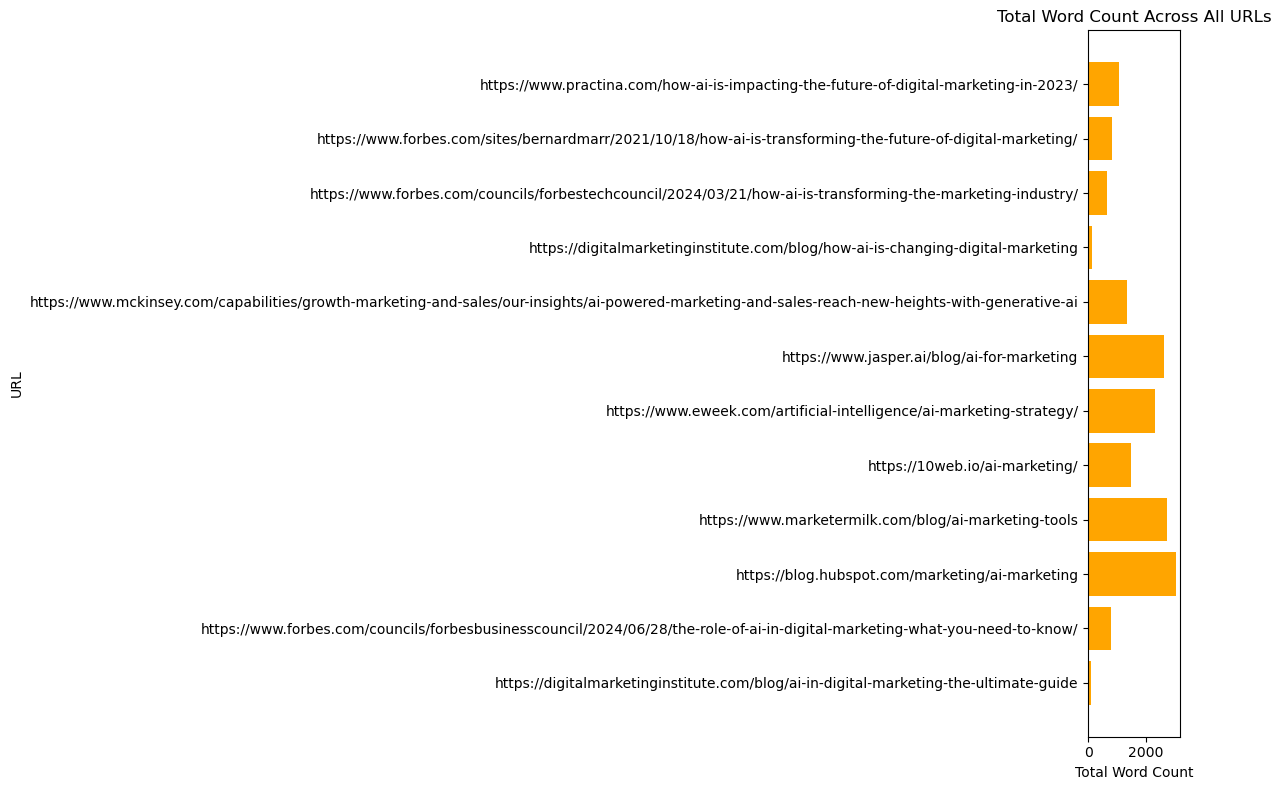

In [26]:
import matplotlib.pyplot as plt

# Plotting the Total Words count for each URL
plt.figure(figsize=(12, 8))
plt.barh(merged_df['URL'], merged_df['Total Words'], color = 'orange')
plt.xlabel('Total Word Count')
plt.ylabel('URL')
plt.title('Total Word Count Across All URLs')
plt.tight_layout()
plt.show()


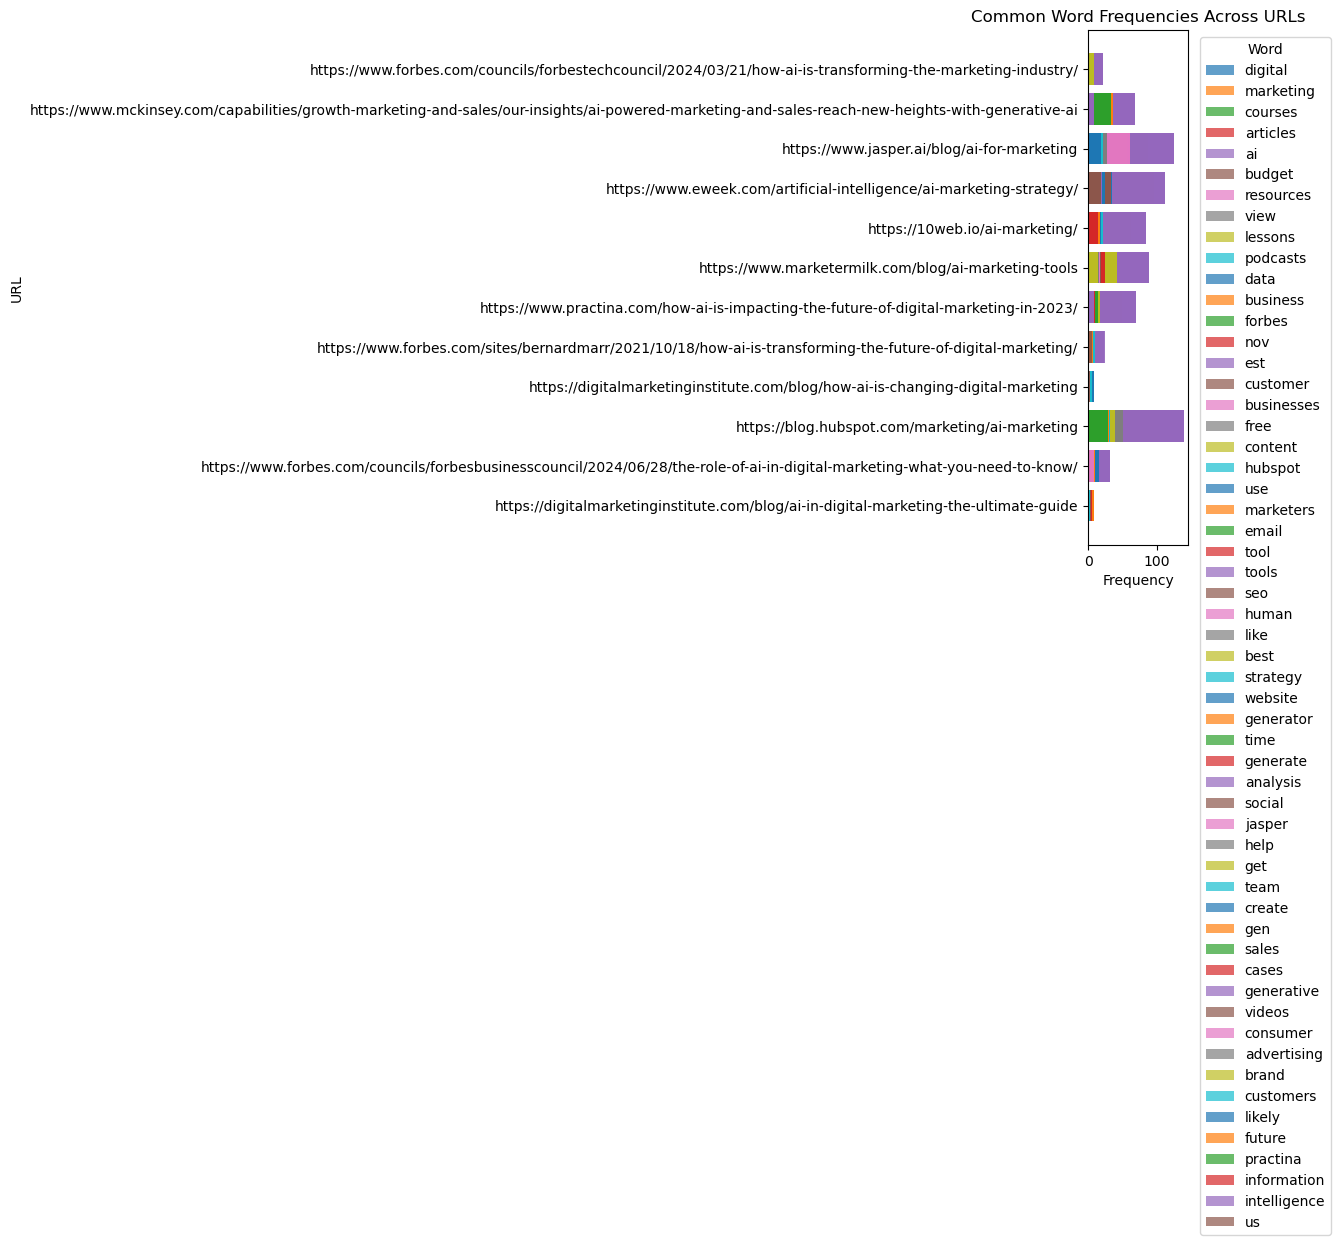

In [31]:


# Merging the summary statistics (total sentences and words) with the common words dataframe
merged_df = summary_df.merge(common_words_df, on='URL', how='left')

# Extracting a subset of the merged dataframe for common words comparison
common_words_columns = [col for col in merged_df.columns if col not in ['URL', 'Total Sentences', 'Total Words']]
common_words_data = merged_df.melt(id_vars=['URL'], value_vars=common_words_columns, var_name='Word', value_name='Frequency')

# Removing NaN values for easier plotting
common_words_data.dropna(inplace=True)

# Plotting common word frequencies across URLs
plt.figure(figsize=(14, 10))

# Using a bar plot to visualize frequencies of common words across different URLs
for word in common_words_columns:
    if word in common_words_data['Word'].unique():
        word_data = common_words_data[common_words_data['Word'] == word]
        plt.barh(word_data['URL'], word_data['Frequency'], label=word, alpha=0.7)

plt.xlabel('Frequency')
plt.ylabel('URL')
plt.title('Common Word Frequencies Across URLs')
plt.legend(title='Word', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


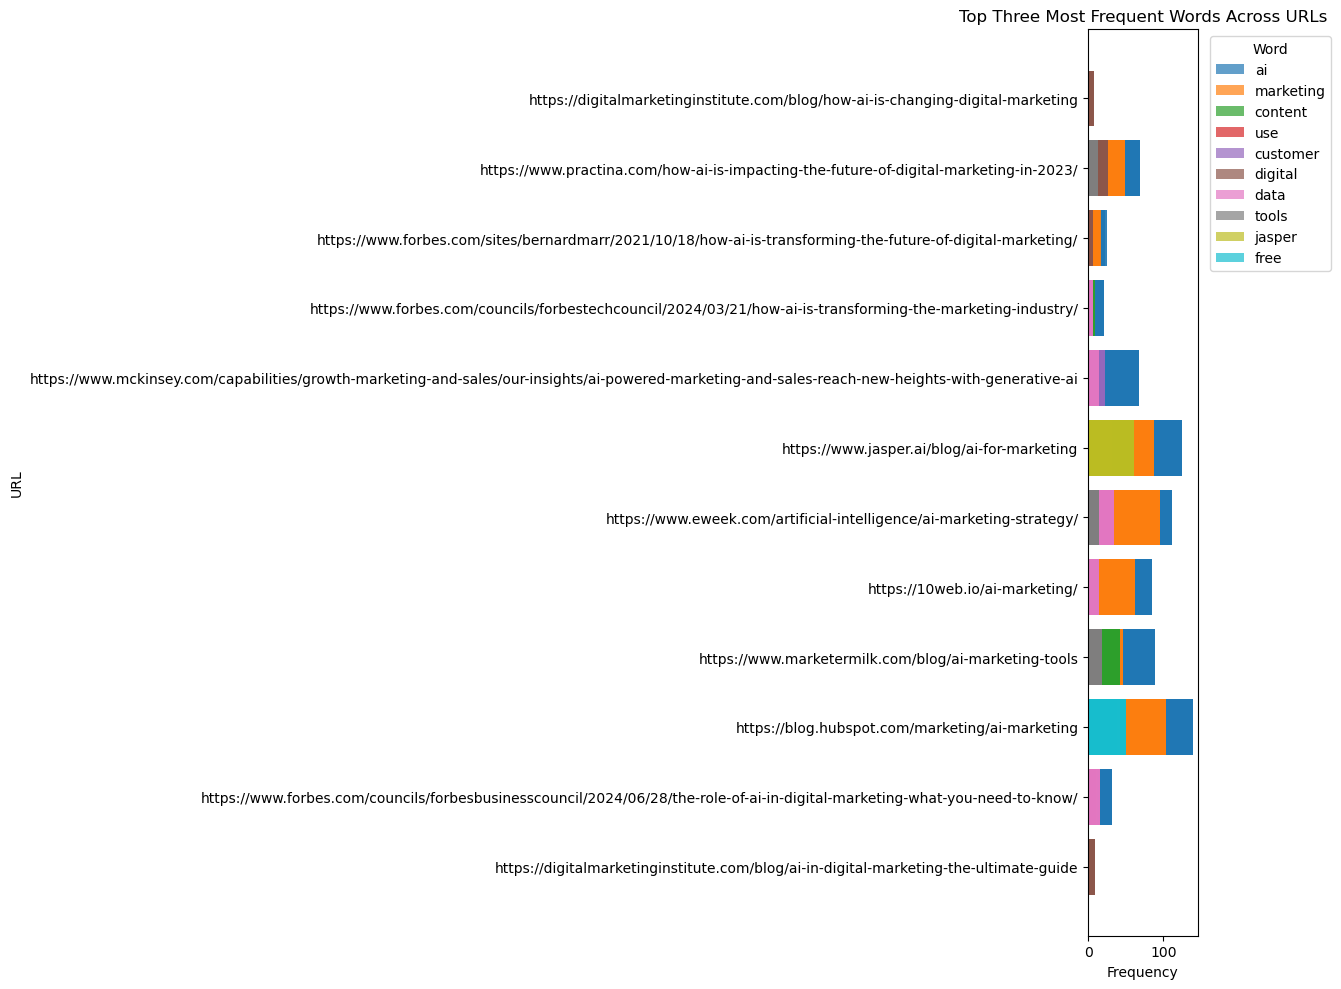

In [36]:
# Calculating the total frequency of each word across all URLs
total_word_frequency = common_words_data.groupby('Word')['Frequency'].sum().reset_index()

# Sorting the words by frequency to find the top three
top_three_words = total_word_frequency.sort_values(by='Frequency', ascending=False).head(10)

# Filtering the data to only include the top three words
top_three_data = common_words_data[common_words_data['Word'].isin(top_three_words['Word'])]

# Plotting the frequencies of the top three most frequent words across URLs
plt.figure(figsize=(14, 10))

for word in top_three_words['Word']:
    word_data = top_three_data[top_three_data['Word'] == word]
    plt.barh(word_data['URL'], word_data['Frequency'], label=word, alpha=0.7)

plt.xlabel('Frequency')
plt.ylabel('URL')
plt.title('Top Three Most Frequent Words Across URLs')
plt.legend(title='Word', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


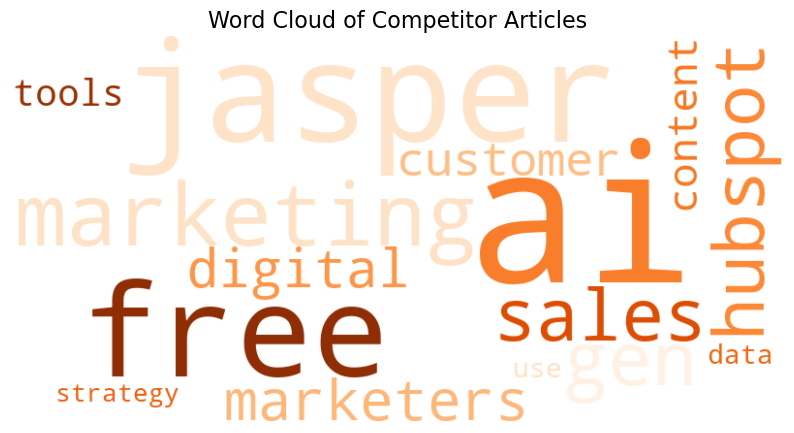

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


total_word_frequency = common_words_data.groupby('Word')['Frequency'].sum().reset_index()

# Sorting the words by frequency to find the top three
top_three_words = total_word_frequency.sort_values(by='Frequency', ascending=False).head(15)

# Filtering the data to only include the top three words
top_three_data = common_words_data[common_words_data['Word'].isin(top_three_words['Word'])]

# Create a dictionary of words and their frequencies
word_freq_dict = dict(zip(top_three_data['Word'], top_three_data['Frequency']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Oranges').generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Competitor Articles', fontsize=16)
plt.show()